API:
sklearn.feature_extraction

    *sklearn.feature_extraction.DictVectorizer()

### 1.字典特征提取(用的多)

适用场景:
数据集中某列特征的有不同的类别,如性别,手机型号等等

使用步骤为:

1.将数据转换为字典

2.用sklearn.feature_extraction.DictVectorizer()方法

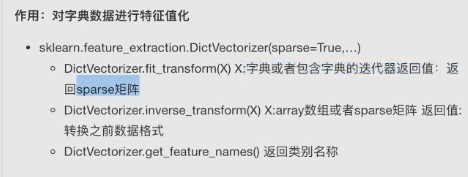

In [1]:
from sklearn.feature_extraction import DictVectorizer

In [2]:
data = [{'city':'北京','temperature':'20'},{'city':'上海','temperature':'30'},{'city':'深圳','temperature':'20'}]

In [3]:
# 返回非稀疏矩阵(推荐)

# 1)实例化一个转换器类
transfer = DictVectorizer(sparse=False)

# 2)调用fit_transform()方法
feature_no_spar = transfer.fit_transform(data) # 对于一类特征,有多种不同的取值,直接用one-hot编码


In [4]:
feature_no_spar

array([[0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.]])

In [5]:
# 获取特征名字
transfer.get_feature_names() # temperature没必要one-hot编码,实际应用时注意下,只转换需要准换的

['city=上海', 'city=北京', 'city=深圳', 'temperature=20', 'temperature=30']

### 2.文本特征抽取

方法1:CountVectorizer,统计每个样本中特征词出现的次数

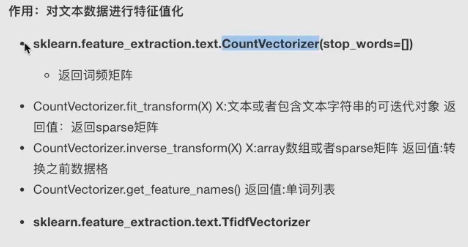

In [26]:
from  sklearn.feature_extraction.text import CountVectorizer

 1)英文文本特征抽取

In [51]:
# 这个列表中有两个元素,在文本处理中,每个样本算是一份文档,所以这个列表中有两个文档
text_data = ['life is short, I like python in my life','There is a lot of people']  

In [62]:
# 虽然CountVectorizer没有spare参数,但是可以直接对结果用toarray()方法转换为数组

# 1.实例化CountVectorizer

 # stop_words表示停用词,就是统计的时候不统计这些词,这些通常是无意义的虚词,具体的常用停用词列表可以去网上搜
count_transfer_nospar = CountVectorizer(stop_words=['in','is','of']) 

# 2.调用fit_transfor方法转换
text_feature_nospar = count_transfer_nospar.fit_transform(text_data).toarray()

In [63]:
text_feature_nospar

array([[2, 1, 0, 1, 0, 1, 1, 0],
       [0, 0, 1, 0, 1, 0, 0, 1]], dtype=int64)

In [64]:
count_transfer_nospar.get_feature_names()

['life', 'like', 'lot', 'my', 'people', 'python', 'short', 'there']

2)中文文本特征抽取

In [66]:
text_chinese = ['我爱北京天安门','天安门上太阳升']

In [67]:

# 1.实例化CountVectorizer
count_transfer_nospar = CountVectorizer()

# 2.调用fit_transfor方法转换
text_feature_nospar = count_transfer_nospar.fit_transform(text_chinese).toarray()

In [68]:
text_feature_nospar # 因为中文没有空格分隔符,所以直接转换会以句子为单位

array([[0, 1],
       [1, 0]], dtype=int64)

需要对中文特征化,需要先分词(即在词之间加空格分割开来,但是手动分割不现实,可以利用一些模块)

In [71]:
# 利用jieba分词来分割
import jieba

In [10]:
# 进行分词
def cut_word(text):
    text_chsplitGe = jieba.cut(text) # 返回结果是一个生成器对象
    text_split = ' '.join(list(text_chsplitGe))
    return text_split

In [84]:
text_chinese_split = []
for sen in text_chinese:
    text_chinese_split.append(cut_word(sen))

In [85]:
text_chinese_split

['我 爱 北京 天安门', '天安门 上 太阳升']

In [86]:
# 1.实例化CountVectorizer
count_transfer_nospar = CountVectorizer()

# 2.调用fit_transfor方法转换
text_feature_nospar = count_transfer_nospar.fit_transform(text_chinese_split).toarray()

In [87]:
text_feature_nospar

array([[1, 1, 0],
       [0, 1, 1]], dtype=int64)

In [89]:
count_transfer_nospar.get_feature_names()  # 长度为1的字符会自动认为stopwords,英文也是一样

['北京', '天安门', '太阳升']

### 3.文本特征提取_进阶方法(用的多)

Tfidf抽取文本特征背景  

直接用计数的方式来提取特征,计数高的词会被认为是比较重要的词,但这些计数高的词也可能只是一些常用词,并不能反映文章的主题,所以需要采用其他的方法来挑选出真正反映文章主题的关键词,这样的关键词的特征是在某篇文章中出现频次很高,在其他文章中出现频次很低  


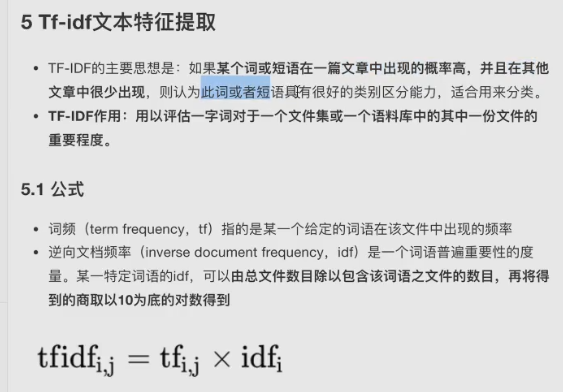

举例: TF-IDF - 重要程度  
    
    lg表示以10为底的对数  
    
    两个词 “经济”，“非常”  
    1000篇文章-语料库  
    100篇文章出现"非常"  
    10篇文章出现“经济”  
    
    某篇文章(100词) :   
    10次“经济”  
        tf:10/100 = 0.1  
        idf:lg 1000/10 = 2  
        TF-IDF:0.2  
        
    10次“非常”  
        tf:10/100 = 0.1  
        idf: lg 1000/100 = 1  
        TF-IDF:0.1 

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
text_chinese = ['这其实一篇科技文章,讲科技的,非常不错','这其实一篇文学文章,讲文学的,非常不错','这其实一篇爱情文章,讲爱情的,非常不错']

In [15]:
text_chinese_split = []
for sen in text_chinese:
    text_chinese_split.append(cut_word(sen))

NameError: name 'jieba' is not defined

In [12]:
# 1.实例化CountVectorizer
count_transfer_nospar = TfidfVectorizer()

# 2.调用fit_transfor方法转换
text_feature_nospar = count_transfer_nospar.fit_transform(text_chinese_split).toarray()

ValueError: empty vocabulary; perhaps the documents only contain stop words

In [103]:
count_transfer_nospar.get_feature_names()

['一篇', '不错', '其实', '文学', '文章', '爱情', '科技', '非常']

In [104]:
text_feature_nospar  # 结果中值较大的可以认为是比较重要的关键词

array([[1, 1, 1, 0, 1, 0, 2, 1],
       [1, 1, 1, 2, 1, 0, 0, 1],
       [1, 1, 1, 0, 1, 2, 0, 1]], dtype=int64)